In [104]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')

import requests
import glob
import os

In [105]:
df1=pd.read_csv(r"C:\Users\Arun kumar L\Downloads\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2=pd.read_csv(r"C:\Users\Arun kumar L\Downloads\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3=pd.read_csv(r"C:\Users\Arun kumar L\Downloads\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4=pd.read_csv(r"C:\Users\Arun kumar L\Downloads\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5=pd.read_csv(r"C:\Users\Arun kumar L\Downloads\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")



In [106]:
# merging all the datasets

df=pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
930268,2024-07,YISHUN,EXECUTIVE,406,YISHUN AVE 6,10 TO 12,142.0,Apartment,1988,838000.0,63 years 03 months
930269,2024-07,YISHUN,EXECUTIVE,792,YISHUN RING RD,07 TO 09,147.0,Apartment,1987,820000.0,62 years 03 months
930270,2024-07,YISHUN,EXECUTIVE,352,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,865000.0,63 years 01 month
930271,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1985,770000.0,60 years 03 months


In [107]:
df.shape


(930273, 11)

In [108]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930273 entries, 0 to 930272
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                930273 non-null  object 
 1   town                 930273 non-null  object 
 2   flat_type            930273 non-null  object 
 3   block                930273 non-null  object 
 4   street_name          930273 non-null  object 
 5   storey_range         930273 non-null  object 
 6   floor_area_sqm       930273 non-null  float64
 7   flat_model           930273 non-null  object 
 8   lease_commence_date  930273 non-null  int64  
 9   resale_price         930273 non-null  float64
 10  remaining_lease      221223 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 78.1+ MB


In [109]:
df.columns


Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [110]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,930273.0,95.689651,25.819895,28.0,73.0,93.0,113.0,307.0
lease_commence_date,930273.0,1988.309135,10.697046,1966.0,1981.0,1986.0,1996.0,2020.0
resale_price,930273.0,321748.118818,171380.538662,5000.0,194000.0,298000.0,419000.0,1588000.0


In [111]:
df['resale_price'].value_counts()


resale_price
300000.0    6929
350000.0    6860
280000.0    6552
320000.0    6530
380000.0    6310
            ... 
152580.0       1
369600.0       1
212380.0       1
259008.0       1
830800.0       1
Name: count, Length: 9564, dtype: int64

In [112]:
# Data Cleaning

df.nunique()


month                   415
town                     27
flat_type                 8
block                  2712
street_name             584
storey_range             25
floor_area_sqm          212
flat_model               34
lease_commence_date      55
resale_price           9564
remaining_lease         727
dtype: int64

In [113]:
df.isna().sum()


month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [114]:
# REMAINING_LEASE

def convert_to_years(row):
    if pd.notna(row) and isinstance(row, str):
        if 'years' in row:
            parts = row.split()
            years = float(parts[0])
            months = float(parts[2]) if len(parts) > 2 else 0
            return years + months / 12
    return row

In [115]:
df['remaining_lease'] =df['remaining_lease'].apply(convert_to_years)


In [116]:
# fill null values in remaining_lease with mode beacuse null value more than 25% it will remove affected in accuracy
df['remaining_lease']=df['remaining_lease'].fillna(df['remaining_lease'].mode()[0])
df.tail()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
930268,2024-07,YISHUN,EXECUTIVE,406,YISHUN AVE 6,10 TO 12,142.0,Apartment,1988,838000.0,63.250000
930269,2024-07,YISHUN,EXECUTIVE,792,YISHUN RING RD,07 TO 09,147.0,Apartment,1987,820000.0,62.250000
930270,2024-07,YISHUN,EXECUTIVE,352,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,865000.0,63.083333
930271,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1985,770000.0,60.250000
930272,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,800000.0,60.166667


In [117]:
df['remaining_lease'].value_counts()


remaining_lease
68.000000    711652
95.000000      2420
67.000000      2212
69.000000      1914
71.000000      1765
              ...  
97.750000         1
97.583333         1
97.250000         1
41.500000         1
97.416667         1
Name: count, Length: 674, dtype: int64

In [118]:
df.isnull().sum()


month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [119]:
df.dtypes


month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
dtype: object

In [120]:
#Month column

# Separate the year and month of resale beacuse this is time series Data
df[['resale_year', 'resale_month']] =df['month'].str.split('-', expand=True)

# drop the resale month column
df.drop('month', axis = 1, inplace= True)

df.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0,1990,01
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0,1990,01


In [121]:
# Split the 'Range' column into lower and upper bounds
df[['storey_lower_bound', 'storey_upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
df['storey_lower_bound'] = pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound'] = pd.to_numeric(df['storey_upper_bound'])

df.tail(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
930271,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1985,770000.0,60.250000,2024,07,1,3
930272,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,800000.0,60.166667,2024,07,4,6


In [122]:
df.drop('storey_range', axis = 1, inplace= True)


In [123]:
# CONVERTING

df['block'] = pd.to_numeric(df['block'], errors='coerce')
df['resale_year'] = pd.to_numeric(df['resale_year'], errors='coerce')
df['resale_month'] = pd.to_numeric(df['resale_month'], errors='coerce')
df['block'] = df['block'].fillna(df['block'].mode()[0])

In [124]:
df.head()


,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,68.0,1990,1,10,12
3,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,7,9
4,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,68.0,1990,1,4,6


In [125]:
df.dtypes


town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
resale_year              int64
resale_month             int64
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

In [126]:
#TEXT ERRORS

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [127]:
df['town'].value_counts()


town
TAMPINES           80196
YISHUN             70278
JURONG WEST        66897
BEDOK              66818
WOODLANDS          65750
ANG MO KIO         52209
HOUGANG            50927
BUKIT BATOK        44618
CHOA CHU KANG      38477
BUKIT MERAH        34478
PASIR RIS          33296
SENGKANG           32699
TOA PAYOH          31638
QUEENSTOWN         28852
GEYLANG            28259
CLEMENTI           28103
BUKIT PANJANG      27787
KALLANG/WHAMPOA    27304
JURONG EAST        24844
SERANGOON          22880
BISHAN             21312
PUNGGOL            20882
SEMBAWANG          13952
MARINE PARADE       8053
CENTRAL AREA        7174
BUKIT TIMAH         2526
LIM CHU KANG          64
Name: count, dtype: int64

In [128]:
df['flat_type'].value_counts()


flat_type
4 ROOM              353695
3 ROOM              296737
5 ROOM              196184
EXECUTIVE            69878
2 ROOM               11930
1 ROOM                1305
MULTI GENERATION       279
MULTI-GENERATION       265
Name: count, dtype: int64

In [129]:
# Replace 'MULTI-GENERATION' with 'MULTI GENERATION' in the specified column to avoid duplicate
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [130]:
df['flat_type'].value_counts()


flat_type
4 ROOM              353695
3 ROOM              296737
5 ROOM              196184
EXECUTIVE            69878
2 ROOM               11930
1 ROOM                1305
MULTI GENERATION       544
Name: count, dtype: int64

In [131]:
df['street_name'].value_counts()


street_name
YISHUN RING RD        17635
BEDOK RESERVOIR RD    14753
ANG MO KIO AVE 10     13841
ANG MO KIO AVE 3      12177
HOUGANG AVE 8          9380
                      ...  
SEMBAWANG WAY            15
GEYLANG EAST AVE 2       15
OUTRAM HILL               9
MARINE PARADE CTRL        3
ALJUNIED AVE 2            1
Name: count, Length: 584, dtype: int64

In [132]:
df['flat_model'].value_counts()


flat_model
Model A                   195981
Improved                  168983
New Generation            110449
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          47112
Simplified                 34402
Apartment                  25690
Standard                   25248
SIMPLIFIED                 23258
Maisonette                 17535
STANDARD                   17375
MAISONETTE                 12215
Model A2                   10177
APARTMENT                   9901
DBSS                        3341
Adjoined flat               1255
Model A-Maisonette          1097
MODEL A-MAISONETTE           982
Terrace                      447
Type S1                      440
MULTI GENERATION             279
Multi Generation             265
TERRACE                      247
Type S2                      217
2-room                       124
Premium Apartment Loft       111
Premium Maisonette            86
Improved-Maisonette           83

In [133]:
df['flat_model'] = df['flat_model'].replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                             'MULTI GENERATION':'Multi Generation ','2-ROOM':'2-room',
                                            'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                             'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                             'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [134]:
df['flat_model'].value_counts()


flat_model
Model A                   266362
Improved                  242572
New Generation            189347
Simplified                 57660
Premium Apartment          47118
Standard                   42623
Apartment                  35591
Maisonette                 29750
Model A2                   10177
DBSS                        3341
Model A-Maisonette          2079
Adjoined flat               1255
Terrace                      694
Multi Generation             544
Type S1                      440
Type S2                      217
2-room                       145
Improved-Maisonette          127
Premium Apartment Loft       111
Premium Maisonette            86
3Gen                          34
Name: count, dtype: int64

In [135]:
# Duplicates

df.duplicated().sum()


2349

In [136]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [137]:
# Outliers

float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block', 'floor_area_sqm', 'resale_price', 'remaining_lease']

In [138]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

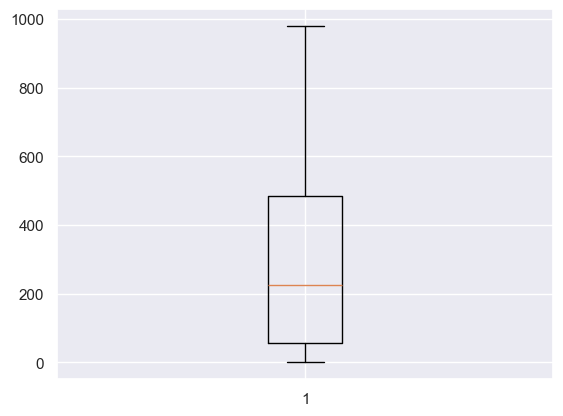

In [139]:
# Using Boxplot

# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()


In [140]:
# IQR

Q1 = df['block'].quantile(0.25)
Q3 = df['block'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-586.0, 1126.0)

In [141]:
df.block = df.block.clip(lower_bound , upper_bound)


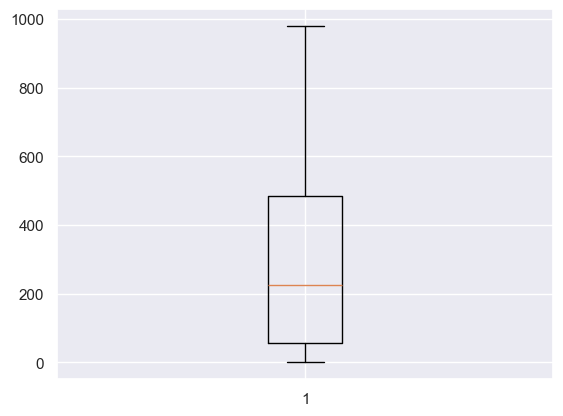

In [142]:
# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()


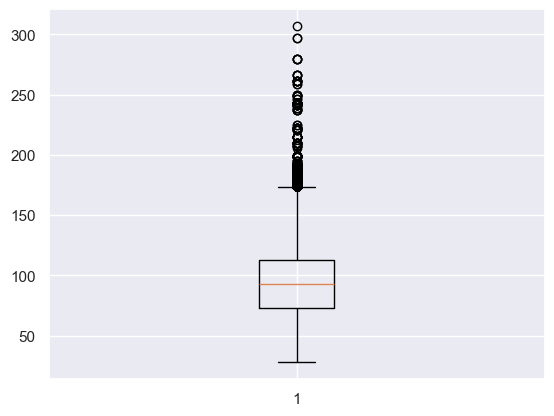

In [143]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()


In [144]:
Q1 = df['floor_area_sqm'].quantile(0.25)
Q3 = df['floor_area_sqm'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(13.0, 173.0)

In [145]:
df.floor_area_sqm = df.floor_area_sqm.clip(lower_bound , upper_bound)


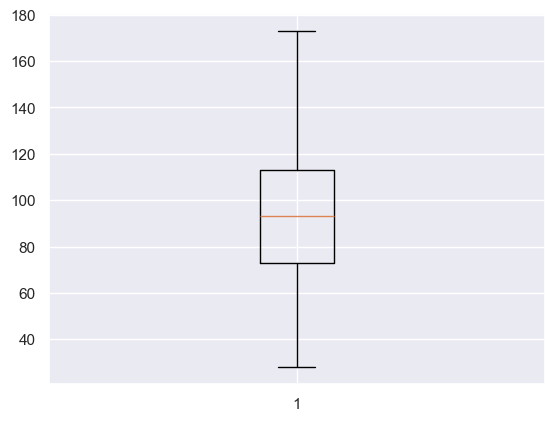

In [146]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()


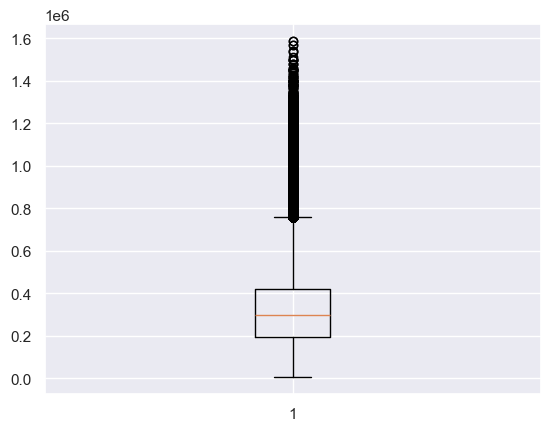

In [147]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

In [148]:
Q1 = df['resale_price'].quantile(0.25)
Q3 = df['resale_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-143500.0, 756500.0)

In [149]:
df.resale_price = df.resale_price.clip(lower_bound , upper_bound)


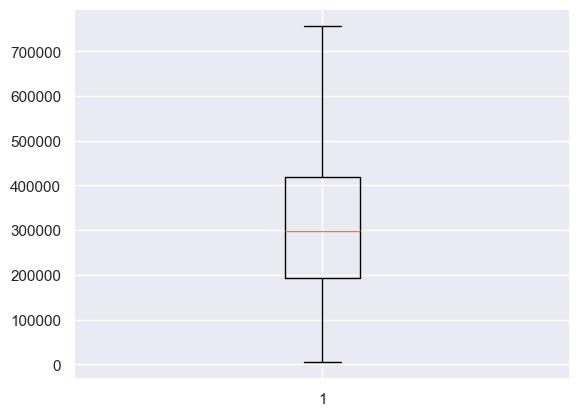

In [150]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()


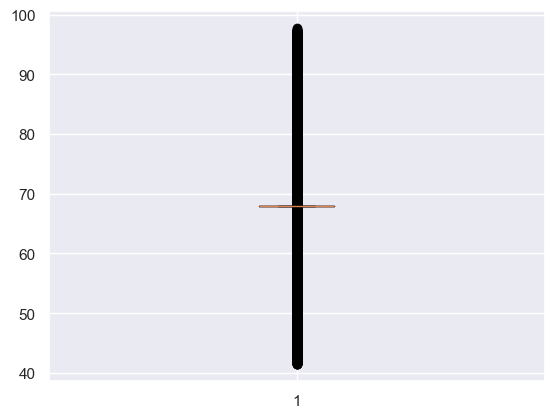

In [151]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

In [152]:
Q1 = df['remaining_lease'].quantile(0.25)
Q3 = df['remaining_lease'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(68.0, 68.0)

In [153]:
df.remaining_lease = df.remaining_lease.clip(lower_bound , upper_bound)


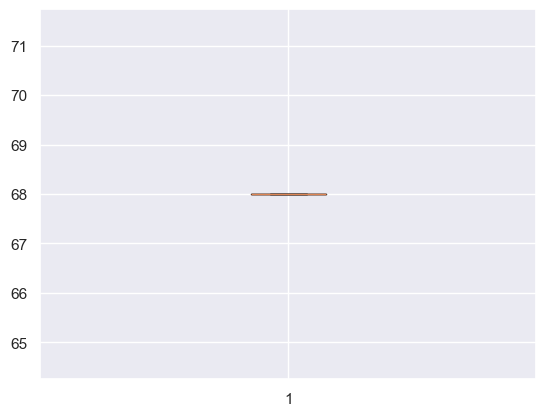

In [154]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

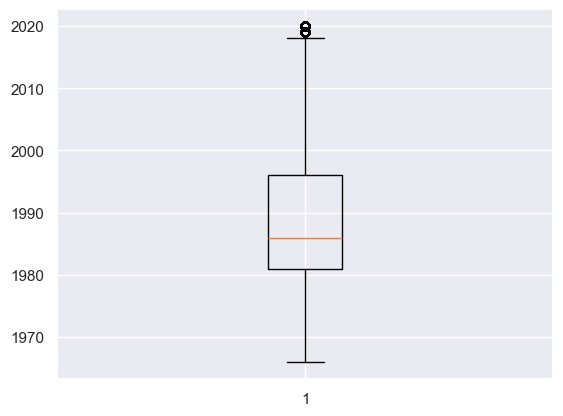

In [155]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()


In [156]:
Q1 = df['lease_commence_date'].quantile(0.25)
Q3 = df['lease_commence_date'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(1958.5, 2018.5)

In [157]:
df.lease_commence_date = df.lease_commence_date.clip(lower_bound , upper_bound)


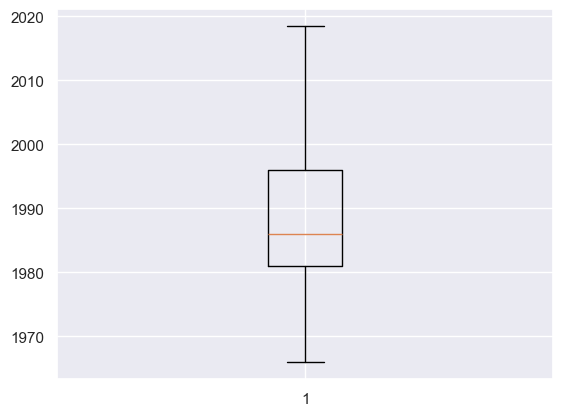

In [158]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()

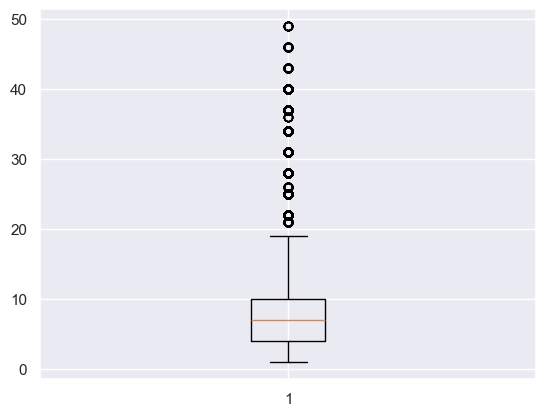

In [159]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

In [160]:
Q1 = df['storey_lower_bound'].quantile(0.25)
Q3 = df['storey_lower_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-5.0, 19.0)

In [161]:
df.storey_lower_bound = df.storey_lower_bound.clip(lower_bound , upper_bound)


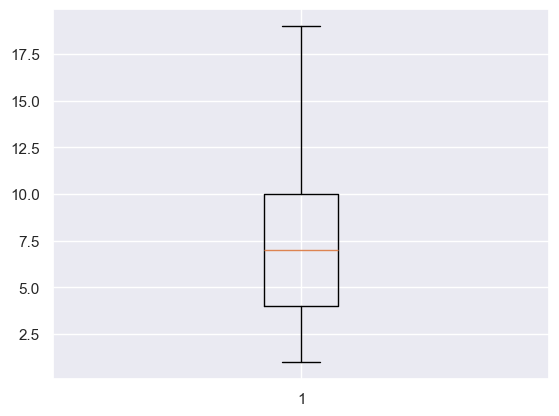

In [162]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()


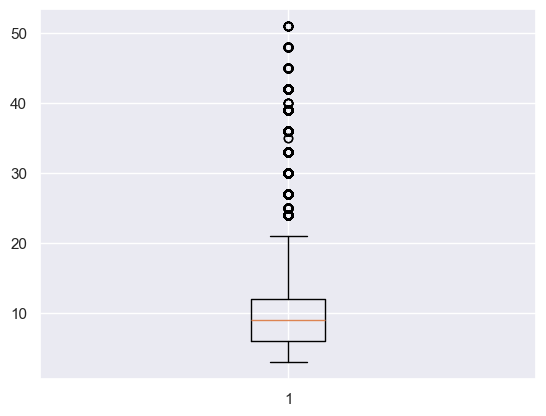

In [163]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()


In [164]:
Q1 = df['storey_upper_bound'].quantile(0.25)
Q3 = df['storey_upper_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-3.0, 21.0)

In [165]:
df.storey_upper_bound = df.storey_upper_bound.clip(lower_bound , upper_bound)


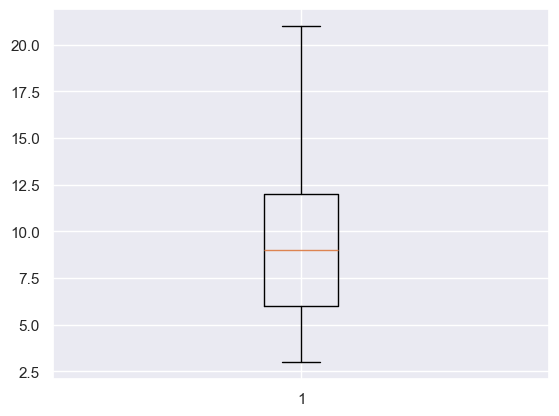

In [166]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

In [ ]:
#EDA - EXPLORATARY DATA ANALYSIS

In [ ]:
# Categorical Vs Frequency using BarPlot


In [167]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

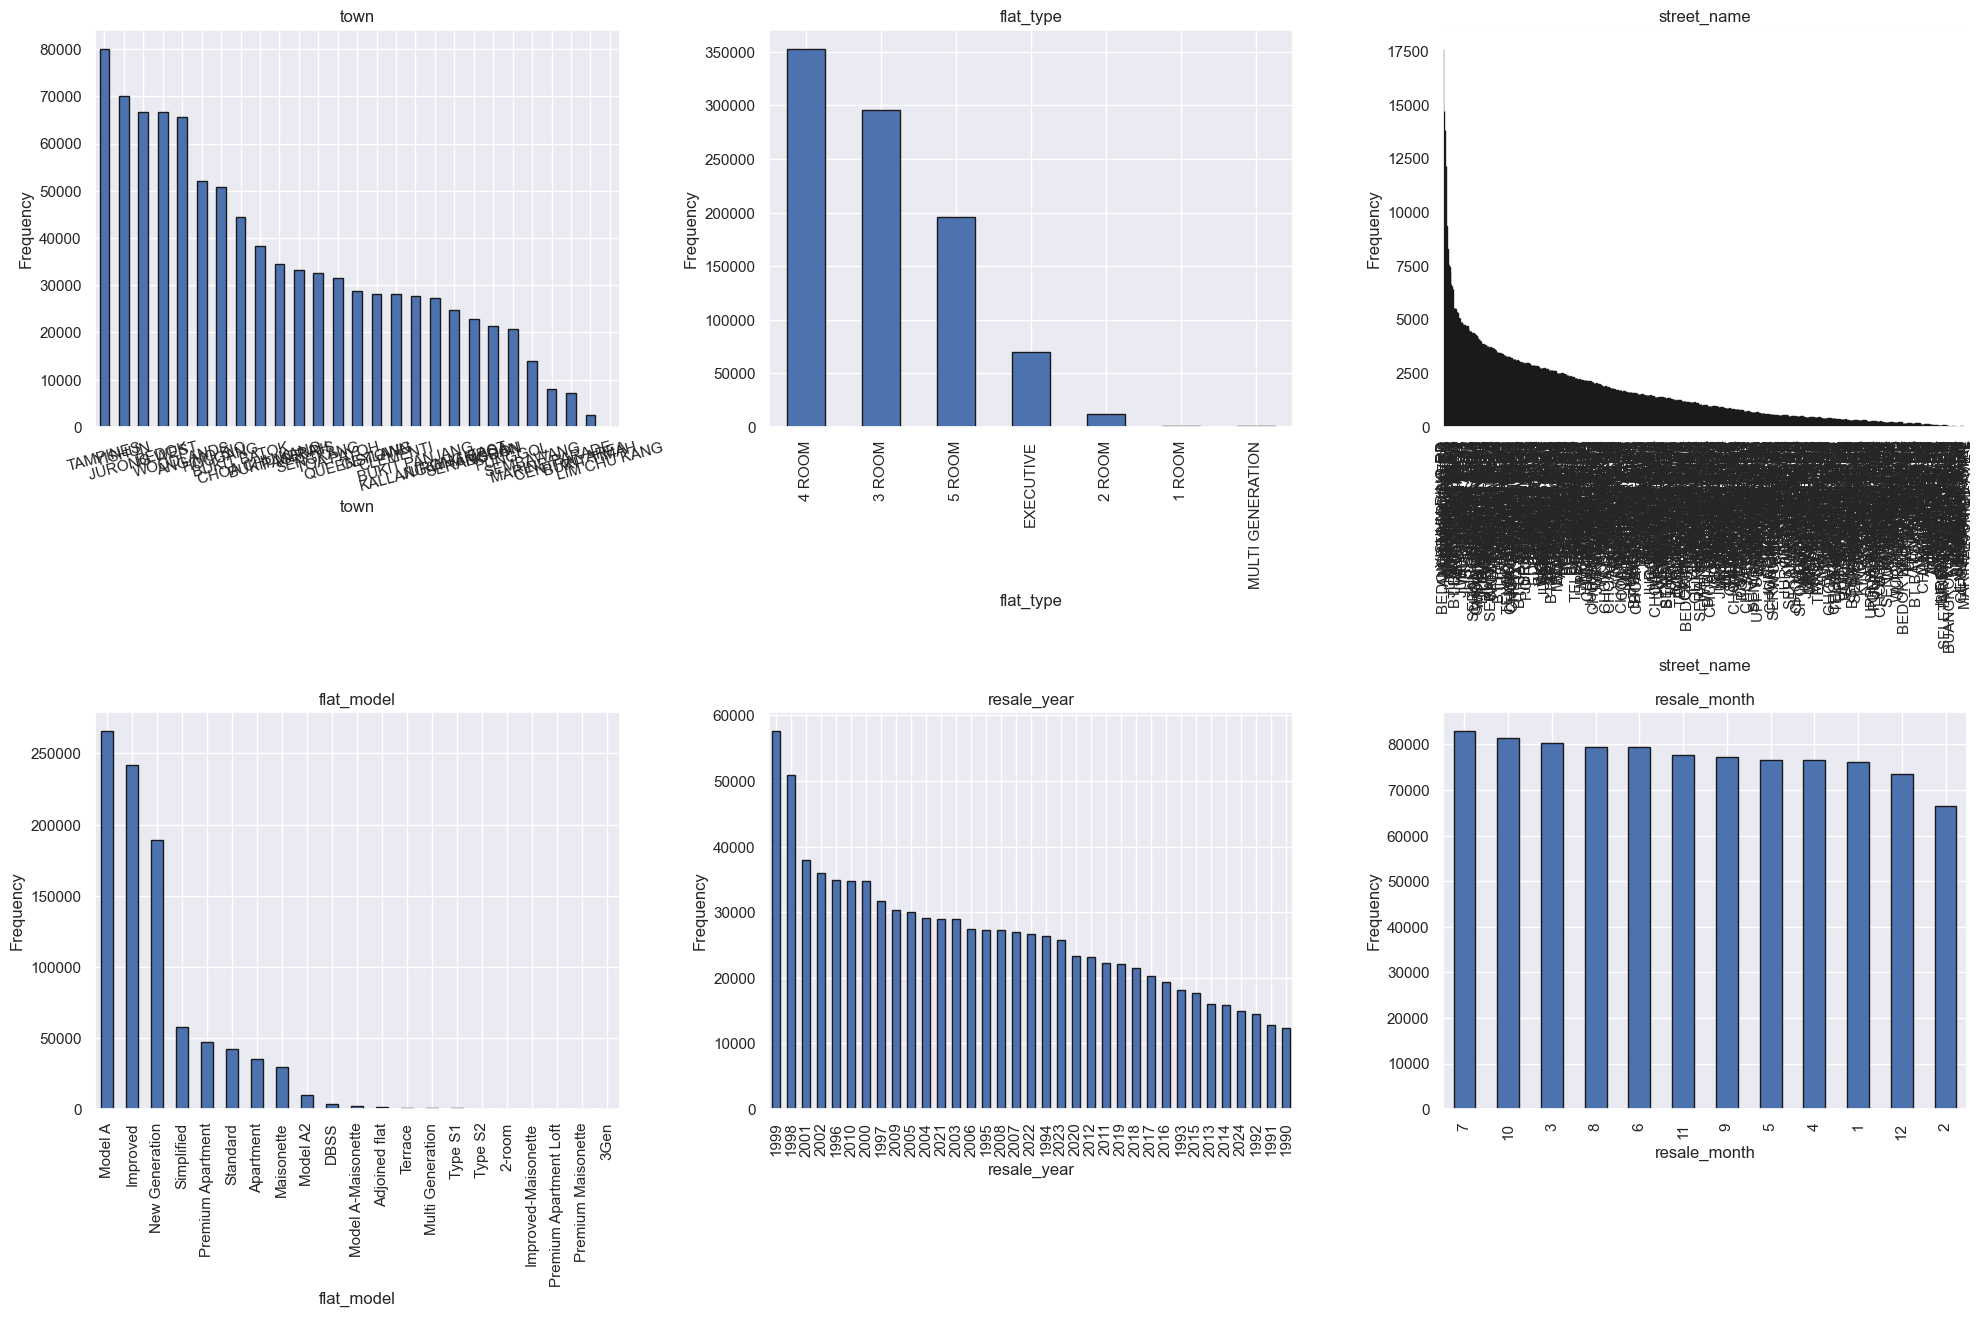

In [168]:
plt.figure(figsize=(20, 25))



plt.subplot(431)
df['town'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('town')
plt.xlabel('town')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['flat_type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_type')
plt.xlabel('flat_type')
plt.ylabel('Frequency')

plt.subplot(433)
df['street_name'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('street_name')
plt.xlabel('street_name')
plt.ylabel('Frequency')

plt.subplot(434)
df['flat_model'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_model')
plt.xlabel('flat_model')
plt.ylabel('Frequency')

plt.subplot(435)
df['resale_year'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_year')
plt.xlabel('resale_year')
plt.ylabel('Frequency')

plt.subplot(436)
df['resale_month'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_month')
plt.xlabel('resale_month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

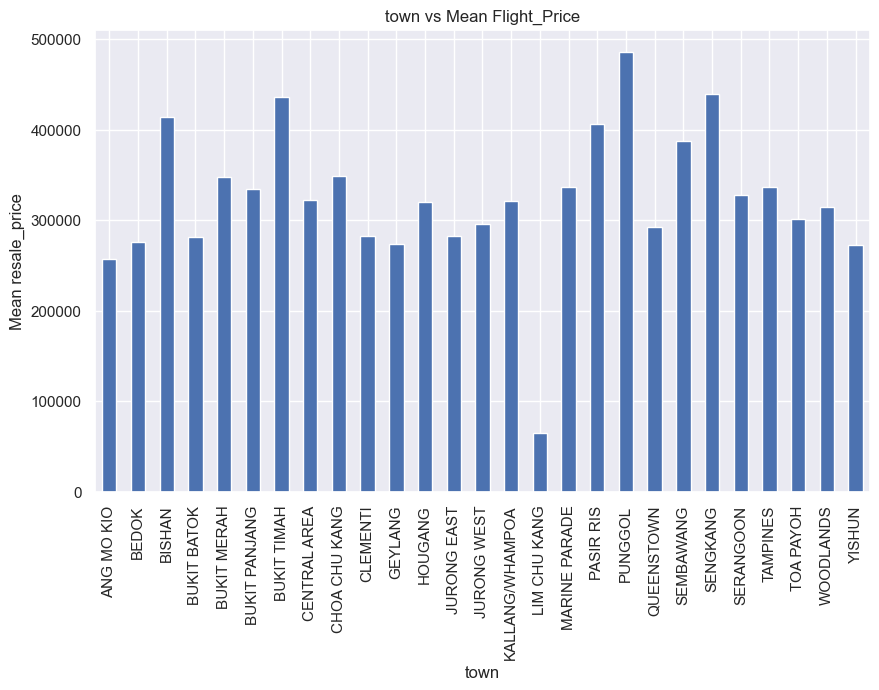

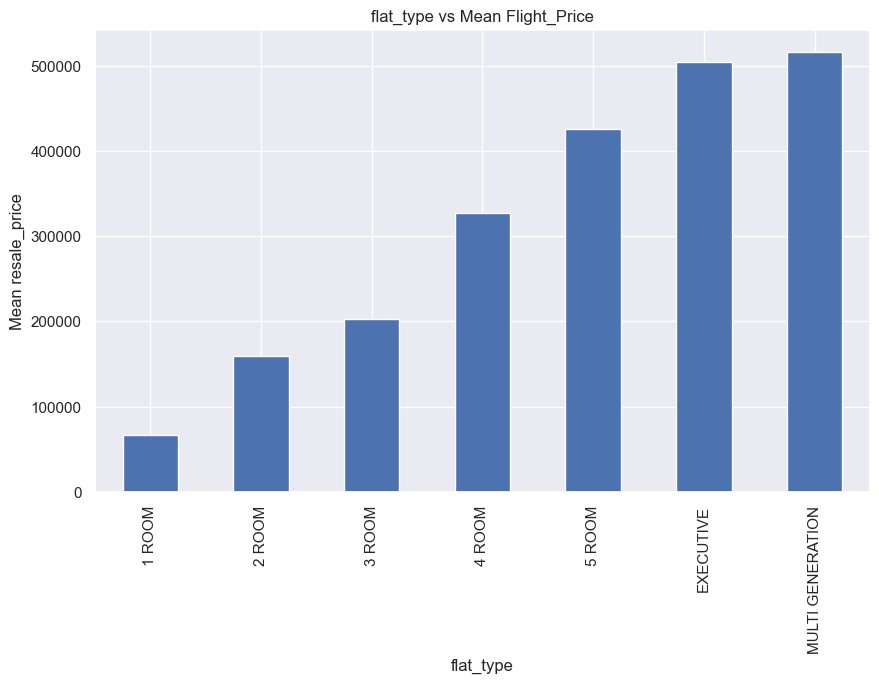

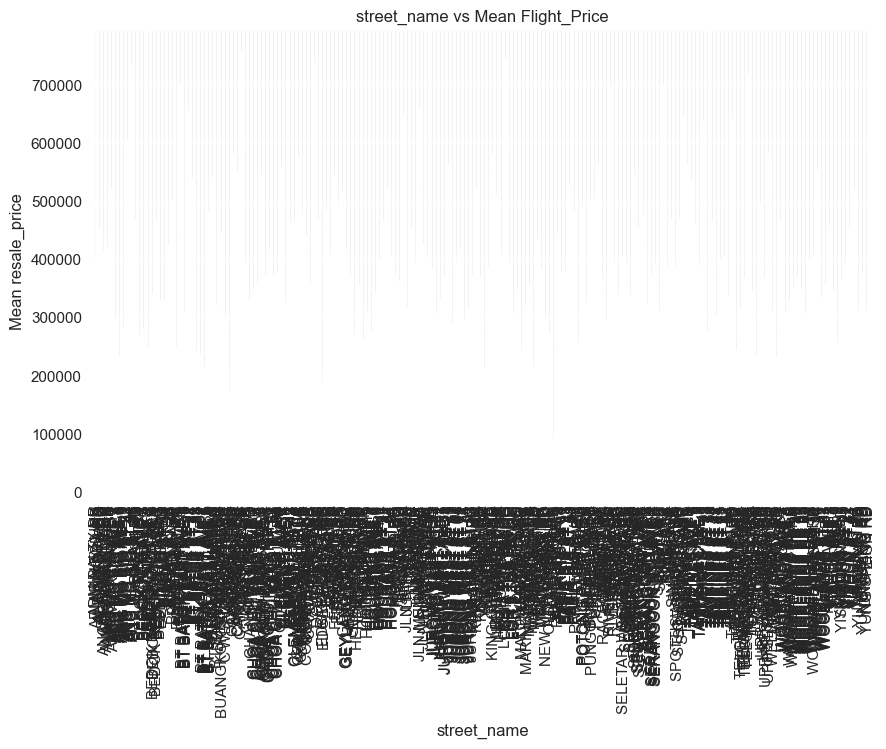

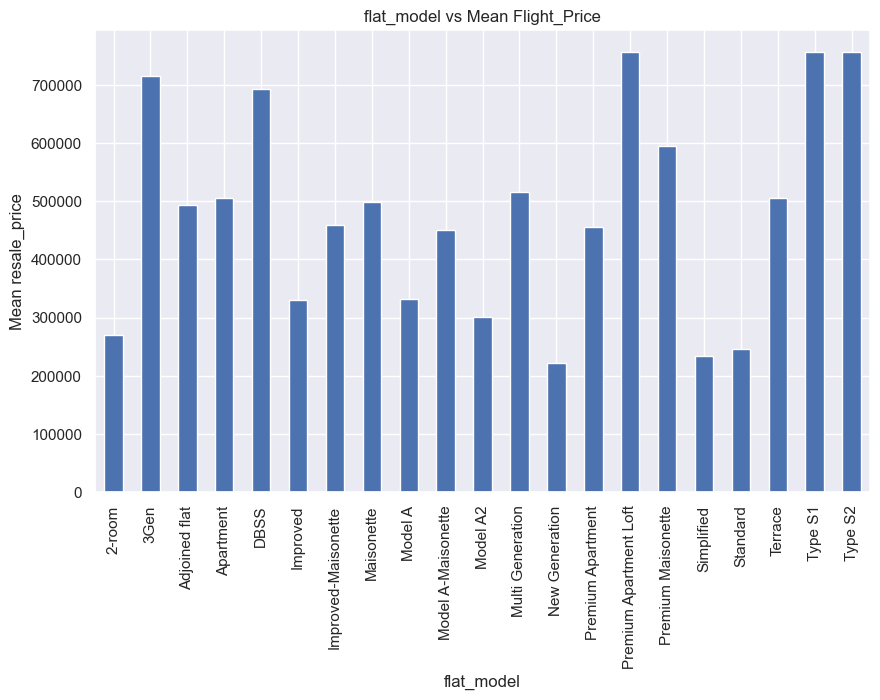

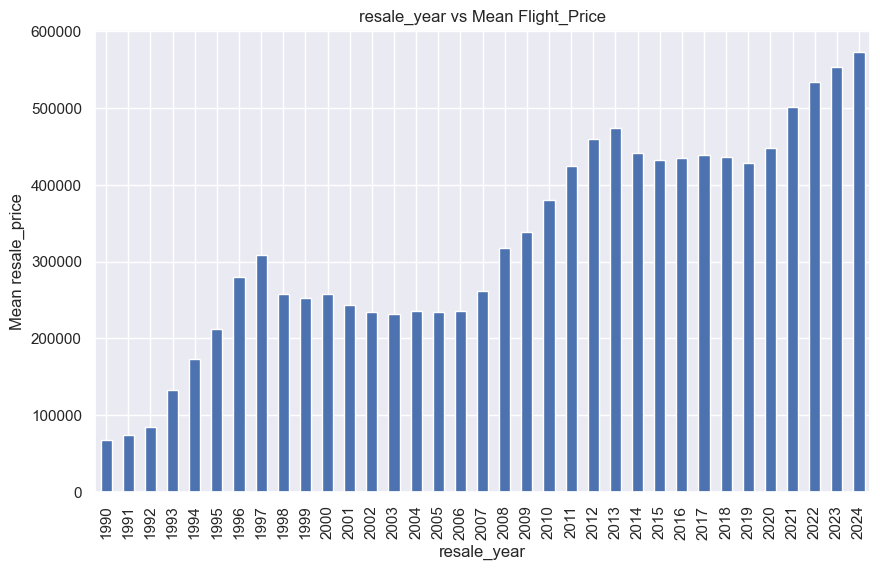

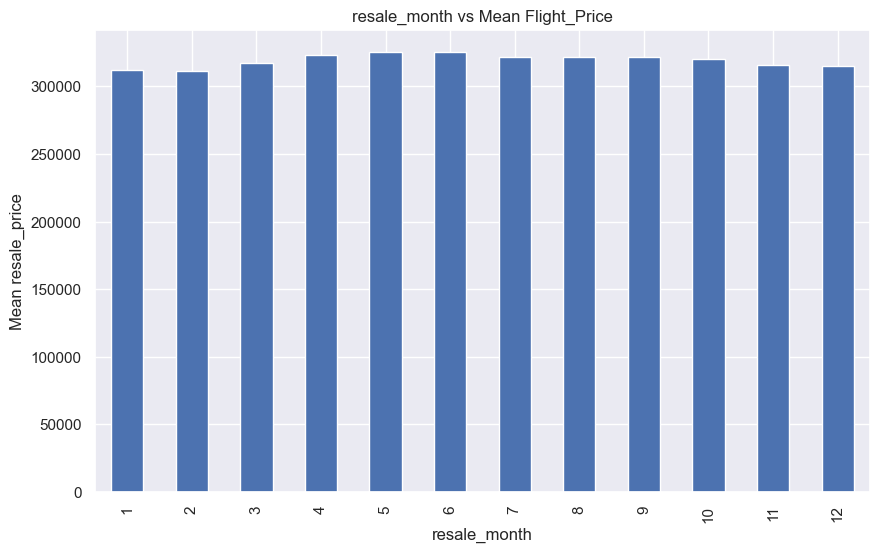

In [169]:
#Feature Vs Target (Categorical Data )

# List of features to plot
features = [
    'town',
 'flat_type',
 'street_name',
 'flat_model',
 'resale_year',
 'resale_month'
]
for feature in features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['resale_price'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean resale_price')
    plt.title(f'{feature} vs Mean Flight_Price')
    plt.show()


In [170]:
# Feature Vs Target (Condinues Data )

float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols


['block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease']

In [171]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['resale_year', 'resale_month', 'storey_lower_bound', 'storey_upper_bound']

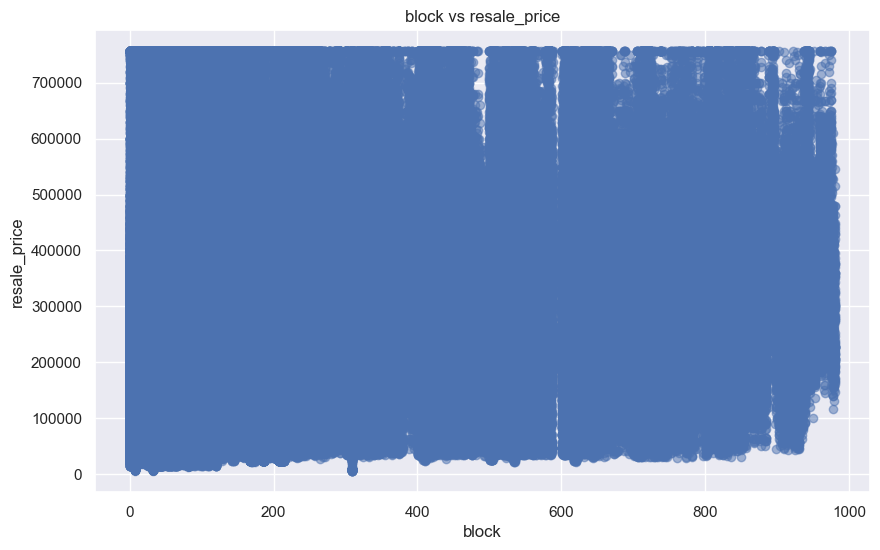

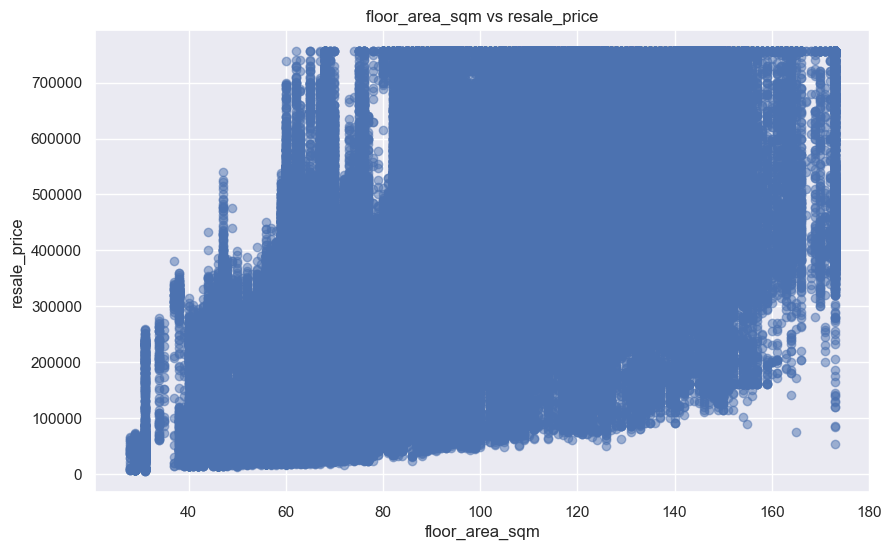

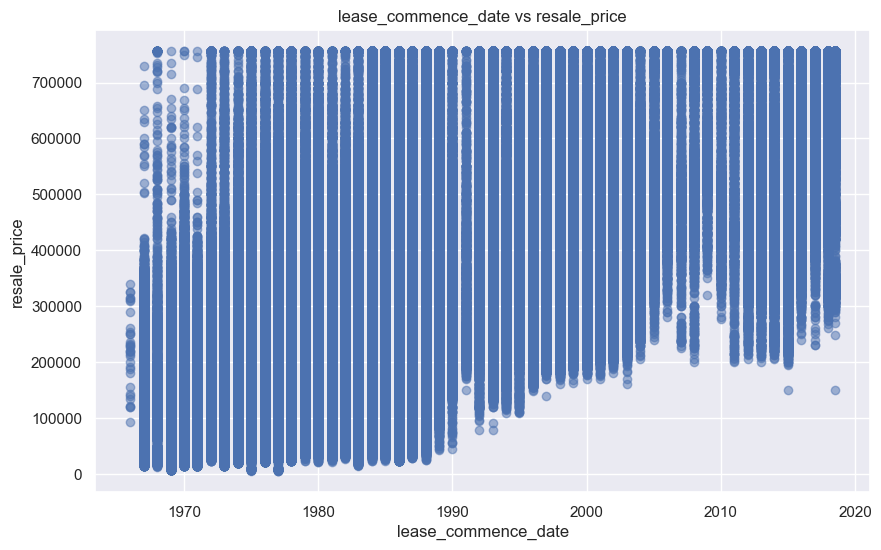

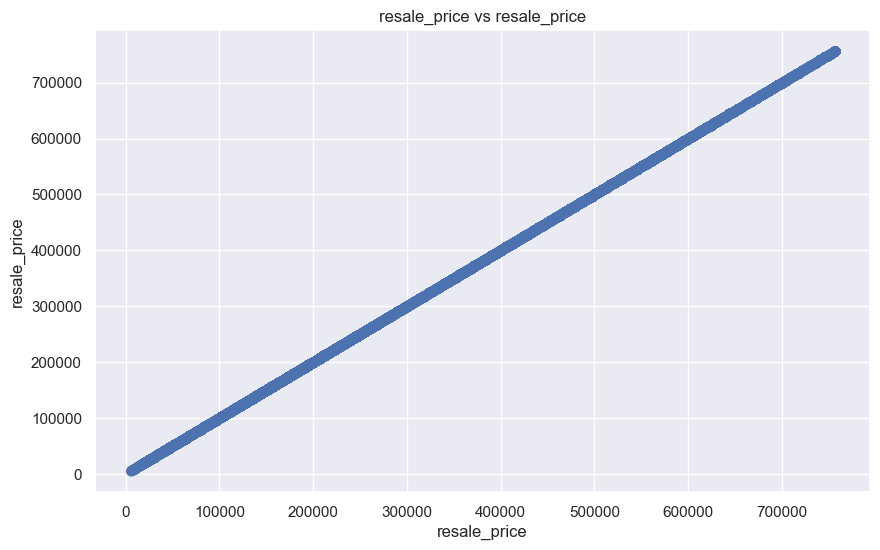

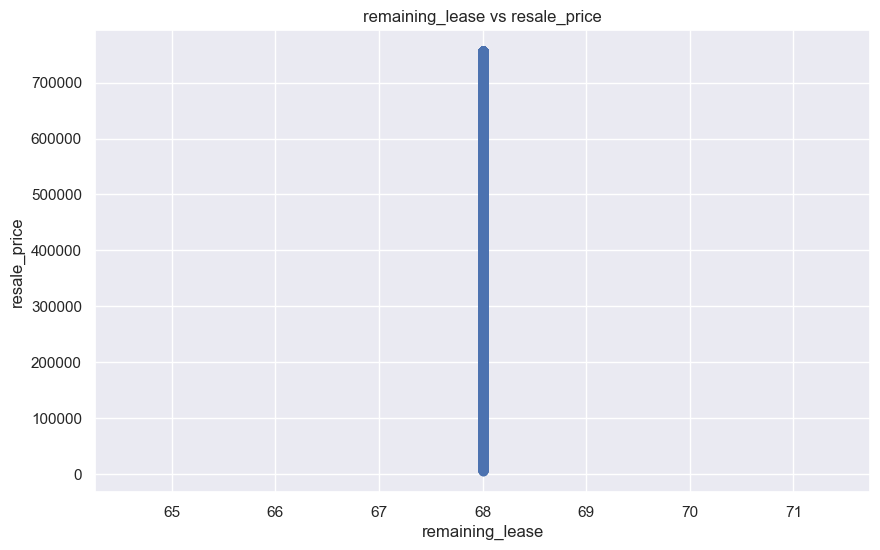

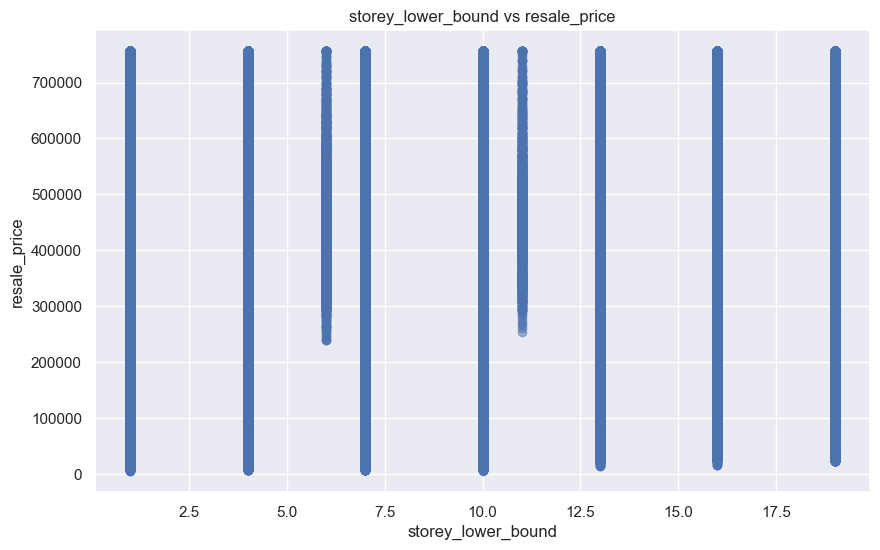

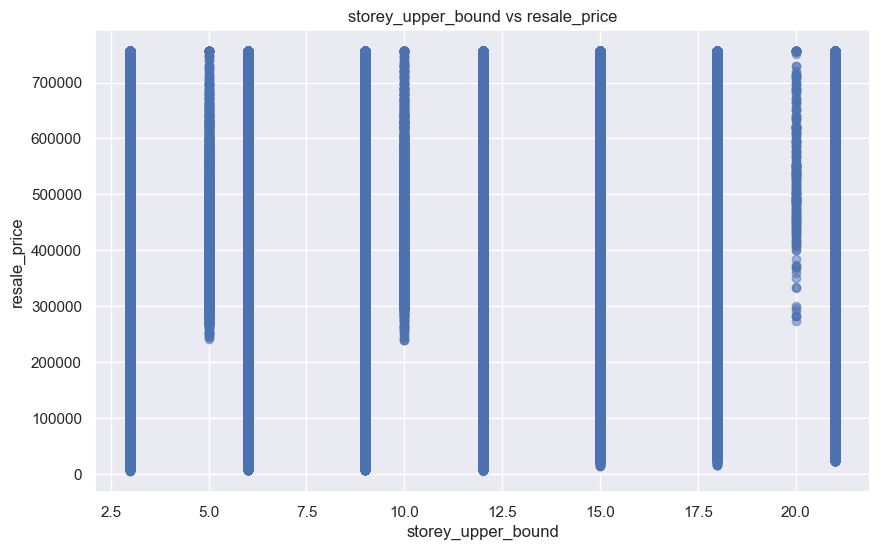

In [172]:
features = [ 'block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease',
'storey_lower_bound',
'storey_upper_bound']
target = 'resale_price'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()


In [ ]:
#Encoding Categorical Variables

In [173]:
#using encoding make a copy
df1=df.copy()

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [174]:
from sklearn.preprocessing import LabelEncoder
# Initialize the Encoder
le= LabelEncoder()

In [175]:
# list unique street names
streets = df1['street_name'].unique()
# map the streets to povide input to ML model
streets_mapping = {street: idx + 1 for idx, street in enumerate(streets)}
streets_mapping

{'ANG MO KIO AVE 1': 1,
 'ANG MO KIO AVE 3': 2,
 'ANG MO KIO AVE 4': 3,
 'ANG MO KIO AVE 10': 4,
 'ANG MO KIO AVE 5': 5,
 'ANG MO KIO AVE 8': 6,
 'ANG MO KIO AVE 6': 7,
 'ANG MO KIO AVE 9': 8,
 'ANG MO KIO AVE 2': 9,
 'BEDOK RESERVOIR RD': 10,
 'BEDOK NTH ST 3': 11,
 'BEDOK STH RD': 12,
 'NEW UPP CHANGI RD': 13,
 'BEDOK NTH RD': 14,
 'BEDOK STH AVE 1': 15,
 'CHAI CHEE RD': 16,
 'CHAI CHEE DR': 17,
 'BEDOK NTH AVE 4': 18,
 'BEDOK STH AVE 3': 19,
 'BEDOK STH AVE 2': 20,
 'BEDOK NTH ST 2': 21,
 'BEDOK NTH ST 4': 22,
 'BEDOK NTH AVE 2': 23,
 'BEDOK NTH AVE 3': 24,
 'BEDOK NTH AVE 1': 25,
 'BEDOK NTH ST 1': 26,
 'CHAI CHEE ST': 27,
 'SIN MING RD': 28,
 'SHUNFU RD': 29,
 'BT BATOK ST 11': 30,
 'BT BATOK WEST AVE 8': 31,
 'BT BATOK WEST AVE 6': 32,
 'BT BATOK ST 21': 33,
 'BT BATOK EAST AVE 5': 34,
 'BT BATOK EAST AVE 4': 35,
 'HILLVIEW AVE': 36,
 'BT BATOK CTRL': 37,
 'BT BATOK ST 31': 38,
 'BT BATOK EAST AVE 3': 39,
 'TAMAN HO SWEE': 40,
 'TELOK BLANGAH CRES': 41,
 'BEO CRES': 42,
 'TELOK B

In [176]:
# alter the column with the mapped numbers
df1['street_name'] = df1['street_name'].map(streets_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [177]:
df1['flat_type'].unique()


array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [178]:
category_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION': 7
}

# alter the column with the mapped numbers
df1['flat_type'] =df1['flat_type'].map(category_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [179]:
# Create a mapping of 'flat_model' values to numbers
flat_model_mapping = {
    'IMPROVED': 1,
    'NEW GENERATION': 2,
    'MODEL A': 3,
    'STANDARD': 4,
    'SIMPLIFIED': 5,
    'MODEL A-MAISONETTE': 6,
    'APARTMENT': 7,
    'MAISONETTE': 8,
    'TERRACE': 9,
    '2-ROOM': 10,
    'IMPROVED-MAISONETTE': 11,
    'MULTI GENERATION': 12,
    'PREMIUM APARTMENT': 13,
    'Improved': 14,
    'New Generation': 15,
    'Model A': 16,
    'Standard': 17,
    'Apartment': 18,
    'Simplified': 19,
    'Model A-Maisonette': 20,
    'Maisonette': 21,
    'Multi Generation': 22,
    'Adjoined flat': 23,
    'Premium Apartment': 24,
    'Terrace': 25,
    'Improved-Maisonette': 26,
    'Premium Maisonette': 27,
    '2-room': 28,
    'Model A2': 29,
    'DBSS': 30,
    'Type S1': 31,
    'Type S2': 32,
    'Premium Apartment Loft': 33,
    '3Gen': 34
}

# Map 'flat_model' values to numbers
df1['flat_model'] =df1['flat_model'].map(flat_model_mapping)

# Display the DataFrame
df1.head(3)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12


In [180]:
# Create a mapping of 'town' values to numbers
town_mapping = {
    'ANG MO KIO': 1,
    'BEDOK': 2,
    'BISHAN': 3,
    'BUKIT BATOK': 4,
    'BUKIT MERAH': 5,
    'BUKIT TIMAH': 6,
    'CENTRAL AREA': 7,
    'CHOA CHU KANG': 8,
    'CLEMENTI': 9,
    'GEYLANG': 10,
    'HOUGANG': 11,
    'JURONG EAST': 12,
    'JURONG WEST': 13,
    'KALLANG/WHAMPOA': 14,
    'MARINE PARADE': 15,
    'QUEENSTOWN': 16,
    'SENGKANG': 17,
    'SERANGOON': 18,
    'TAMPINES': 19,
    'TOA PAYOH': 20,
    'WOODLANDS': 21,
    'YISHUN': 22,
    'LIM CHU KANG': 23,
    'SEMBAWANG': 24,
    'BUKIT PANJANG': 25,
    'PASIR RIS': 26,
    'PUNGGOL': 27
}

# Map 'town' values to numbers
df1['town'] = df1['town'].map(town_mapping)

# Display the DataFrame
df1.head(4)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,1,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12
3,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,7,9


In [181]:
# save the preprocessed data for the deployment
df1.to_csv('finaldata.csv',index= False)

In [182]:
# To read the file

df1=pd.read_csv('finaldata.csv')



In [183]:
# Correlation

# correlation matrix (ranges from 1 to -1)
corrm=df1.corr()
#corrm.to_csv('corrm.csv')
corrm

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
town,1.000000,0.208303,0.050102,0.586993,0.201063,0.163843,0.332918,0.123367,NaN,0.123963,0.003899,-0.019005,-0.018743
flat_type,0.208303,1.000000,0.127785,0.386386,0.954857,0.242221,0.407099,0.598438,NaN,0.100613,0.003380,0.077338,0.077668
block,0.050102,0.127785,1.000000,0.045726,0.187825,-0.003400,0.001801,-0.084013,NaN,-0.117285,0.002297,-0.125041,-0.125076
street_name,0.586993,0.386386,0.045726,1.000000,0.355214,0.354250,0.737193,0.379154,NaN,0.317453,0.006089,0.082087,0.082719
floor_area_sqm,0.201063,0.954857,0.187825,0.355214,1.000000,0.200156,0.384983,0.572784,NaN,0.062269,0.002838,0.043575,0.043763
flat_model,0.163843,0.242221,-0.003400,0.354250,0.200156,1.000000,0.355342,0.245761,NaN,0.162396,0.001515,0.020210,0.020565
lease_commence_date,0.332918,0.407099,0.001801,0.737193,0.384983,0.355342,1.000000,0.544445,NaN,0.431891,0.003262,0.154580,0.154972
resale_price,0.123367,0.598438,-0.084013,0.379154,0.572784,0.245761,0.544445,1.000000,NaN,0.685163,0.004835,0.210345,0.212974
remaining_lease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resale_year,0.123963,0.100613,-0.117285,0.317453,0.062269,0.162396,0.431891,0.685163,NaN,1.000000,-0.026108,0.097029,0.099045


In [ ]:
#Heatmap

<Axes: >

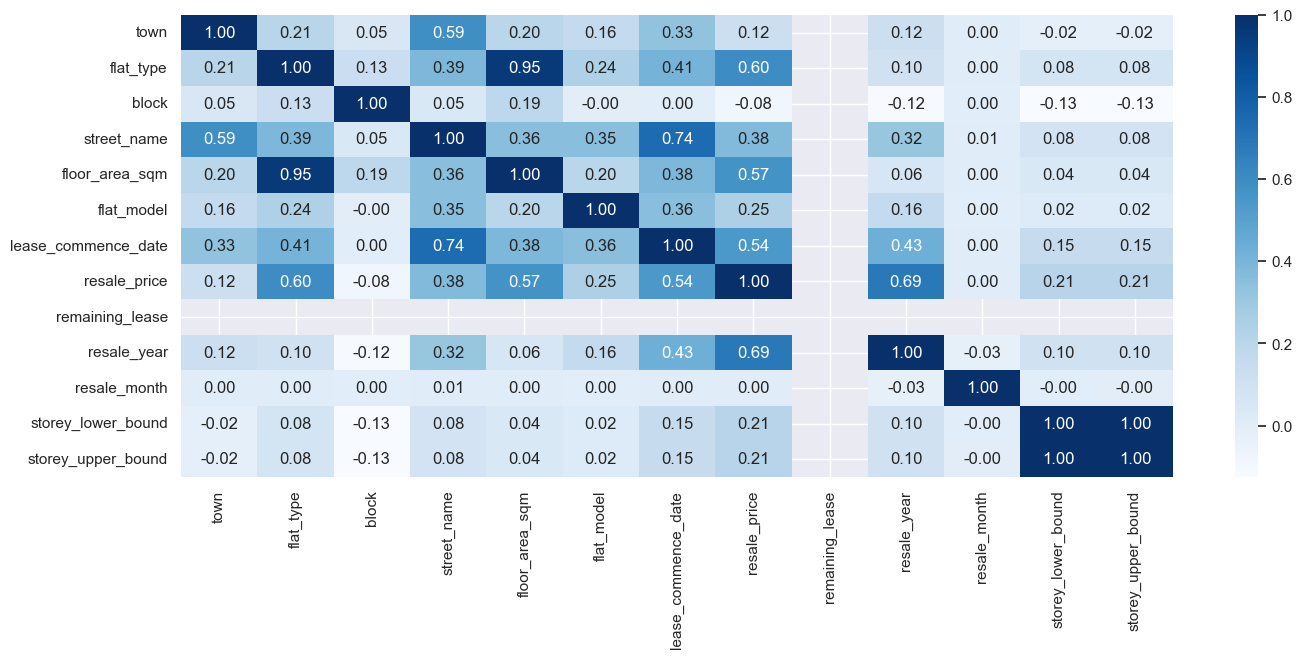

In [184]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="Blues",fmt=".2f")

In [ ]:
#TO MEACHIN LEARNING

In [ ]:
#Split

In [185]:
# assign feature and target variable
x = df1.drop('resale_price', axis= 1)
y = df1['resale_price']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=72)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(742339, 12) (185585, 12) (742339,) (185585,)


In [186]:
#Scalling

In [187]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled ,x_test_scaled

(array([[-0.46982368, -0.01678808,  0.19239002, ...,  1.30481069,
          0.0926729 ,  0.08946487],
        [ 0.94044612, -0.01678808, -0.68375357, ...,  0.42498897,
         -0.58117061, -0.58450549],
        [ 0.55582709, -1.07131892, -1.09896944, ...,  0.42498897,
         -1.25501412, -1.25847585],
        ...,
        [ 1.45327151,  1.03774276, -0.18854198, ..., -0.16155884,
          1.44035991,  1.43740559],
        [ 0.2994144 , -0.01678808, -0.75993997, ...,  0.42498897,
          1.44035991,  1.43740559],
        [-1.23906175, -0.01678808,  0.44761445, ...,  0.71826287,
         -0.58117061, -0.58450549]]),
 array([[ 0.68403343,  1.03774276,  0.02097062, ..., -0.16155884,
         -0.58117061, -0.58450549],
        [-0.34161733, -0.01678808,  2.4056049 , ..., -1.33465447,
         -1.25501412, -1.25847585],
        [ 0.2994144 , -1.07131892, -1.0532576 , ...,  1.30481069,
          0.0926729 ,  0.08946487],
        ...,
        [ 1.06865247, -0.01678808,  0.26857641, ..., -

In [ ]:
#Model Fit

In [188]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor  # Use XGBRegressor for regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
#Linear Regression

In [189]:
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(x_train,y_train)
print(linear_model.predict(x_test))  #prediction
print(y_test)

[311793.82710153 238226.23624939  96014.07360274 ... 337230.45187445
 120708.70476772 409694.74552508]
260683    330000.0
398541    242500.0
107152    177000.0
201066    280000.0
189257    260000.0
            ...   
564320    230888.0
117494    450000.0
512729    193000.0
300402    158000.0
452899    240000.0
Name: resale_price, Length: 185585, dtype: float64


In [190]:
linear_model.score(x_test, y_test)


0.7927969867803965

In [191]:
from sklearn.model_selection import cross_val_score
cross_val_linear_model=cross_val_score(linear_model,x_train,y_train,cv=10).mean()
cross_val_linear_model


0.792650003279648

In [ ]:
#KNN-K Nearest Neighbor Regression

In [192]:
# Create and train the K Nearest Neighbor Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You may need to adjust the number of neighbors
knn_regressor.fit(x_train_scaled, y_train)

# Make predictions on the test set using KNN model
y_pred_knn = knn_regressor.predict(x_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2) Score
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)

Mean Absolute Error (MAE)    : 28958.945715386482
Mean Squared Error (MSE)     : 1777603054.54132
Root Mean Square Error (RMSE): 42161.63012196421
R-squared (R2) Score         : 0.9334321356062852


In [ ]:
#Decision Tree Regression

In [193]:
# Create and train the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state=11)
dt_regressor.fit(x_train, y_train)

# Make predictions on the test set using Decision Tree model
y_pred_dt = dt_regressor.predict(x_test)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)

# Calculate R-squared (R2) Score
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Absolute Error (MAE)    :", mae_dt)
print("Mean Squared Error (MSE)     :", mse_dt)
print("Root Mean Square Error (RMSE):", rmse_dt)
print("R-squared (R2) Score         :", r2_dt)

Mean Absolute Error (MAE)    : 17587.100970668827
Mean Squared Error (MSE)     : 686046367.7281034
Root Mean Square Error (RMSE): 26192.4868565034
R-squared (R2) Score         : 0.9743088641426143


In [ ]:
#Random Forest Regression

In [194]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(x_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
rf_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", rf_r2)

Mean Absolute Error (MAE)    : 13901.793941142476
Mean Squared Error (MSE)     : 405522073.3650519
Root Mean Square Error (RMSE): 20137.578637091698
R-squared (R2) Score         : 0.9848139671455569


In [ ]:
#Xg Boost Regression

In [195]:
# Create and train an XGBoost regressor
xgregressor = XGBRegressor()
xgregressor.fit(x_train, y_train)

# Make predictions
y_pred = xgregressor.predict(x_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
xgb_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", xgb_r2)

Mean Absolute Error (MAE)    : 17028.86193893614
Mean Squared Error (MSE)     : 569305020.5070553
Root Mean Square Error (RMSE): 23860.113589567325
R-squared (R2) Score         : 0.9786806062765495


In [ ]:
#Finalizing The Models:

In [205]:
import plotly.express as px

# Example R2 scores (ensure these are defined with your actual values)
r2_knn = 0.9334321356062852  # Example score for KNeighborsRegressor
r2_dt = 0.9743088641426143  # Example score for DecisionTreeRegressor
rf_r2 = 0.9848139671455569  # Example score for RandomForestRegressor
xgb_r2 = 0.9786806062765495  # Example score for XGBRegressor

models = ['KNeighborsRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor']
scores = [r2_knn, r2_dt, rf_r2, xgb_r2]

# Create bar plot
fig = px.bar(x=models, y=scores, title='R_2 of Regression Models')

# Save the figure as an HTML file
fig.write_html("regression_models_r2.html")

# Display a message indicating where to find the HTML file
print("Plotly figure saved as 'regression_models_r2.html'. Open this file in a web browser to view the plot.")

# Find the model with the maximum R2 score
print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(scores)
max_model = ""

for model, score_value in zip(models, scores):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contains the Maximum R2 Score: {max_score}")


Plotly figure saved as 'regression_models_r2.html'. Open this file in a web browser to view the plot.
FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

KNeighborsRegressor 0.9334321356062852
DecisionTreeRegressor 0.9743088641426143
RandomForestRegressor 0.9848139671455569
XGBRegressor 0.9786806062765495

Model: RandomForestRegressor contains the Maximum R2 Score: 0.9848139671455569


In [207]:
# Suggestion:

rf_regressor.feature_importances_


array([0.04424603, 0.06186685, 0.01428474, 0.02368783, 0.26565131,
       0.00761428, 0.02787715, 0.        , 0.53825815, 0.00644446,
       0.00454365, 0.00552556])

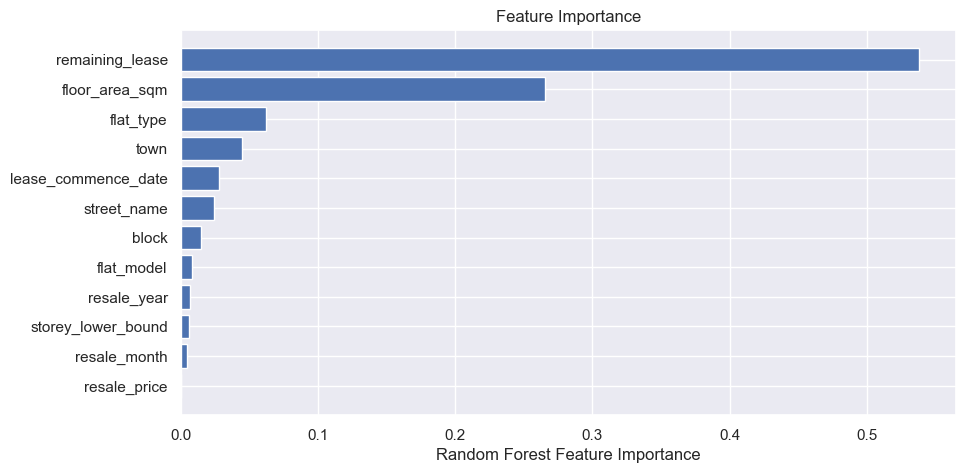

In [208]:
sorted_idx = rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")

plt.show()


In [209]:
# Save the model

model=rf_regressor.fit(x_train,y_train)
model


RandomForestRegressor(random_state=42)

In [210]:
import pickle

# save the model to disk
filename = 'RandomForestRegressor_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(filename, file)

print(f"Saved {filename} model to disk")

Saved RandomForestRegressor_model.pkl model to disk


In [ ]:
#Prediction

In [211]:
# get sample to predict the resale price
pre_df =df1.sample(n=5)
pre_df


,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
730085,14,4,9.0,239,95.0,30,2011.0,756500.0,68.0,2016,4,19,21
116187,18,3,215.0,183,67.0,15,1985.0,160000.0,68.0,1996,2,10,12
76063,20,4,213.0,199,82.0,14,1975.0,190000.0,68.0,1994,8,1,3
746330,18,4,225.0,183,92.0,15,1985.0,450000.0,68.0,2017,2,4,6
823262,27,4,2.0,500,90.0,16,2015.0,465000.0,68.0,2020,9,13,15


In [212]:
# drop the resale price column
A = pre_df.drop('resale_price', axis = 1)

In [ ]:
#Resale Price

In [213]:
# Make predictions on the sample
pre_pred = rf_regressor.predict(A)
pre_pred

array([756500.        , 155720.        , 182610.        , 439814.48      ,
       457491.13714286])